In [231]:
#Don't have to call plt.show()
%matplotlib inline

In [232]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [233]:
#Load data from files
mouse_file = os.path.join('.','data','mouse_drug_data.csv')
trial_file = os.path.join('.','data','clinicaltrial_data.csv')

mouse_data_df = pd.read_csv(mouse_file)
clin_data_df = pd.read_csv(trial_file)

clin_data_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [234]:
mouse_data_df.head(15)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
5,o848,Stelasyn
6,z314,Stelasyn
7,g989,Stelasyn
8,m269,Stelasyn
9,a963,Stelasyn


In [235]:
#Get count of mice per drug, so value count based on Drug columns
count_per_drug = mouse_data_df['Drug'].value_counts()
count_per_drug
#So there are 9 drugs plus a single placebo, directions indicate we're only interested in Capomulin, Infubinol, Ketapril, adn Placebo
#And, there are 25 mice for each drug/placebo

Zoniferol    25
Ceftamin     25
Ramicane     25
Propriva     25
Ketapril     25
Infubinol    25
Capomulin    25
Stelasyn     25
Naftisol     25
Placebo      25
Name: Drug, dtype: int64

In [236]:
#How many time points do we have
num_time_points = clin_data_df['Timepoint'].value_counts()
num_time_points
#Our timepoints start at zero and end at 45 days in increments of 5

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [237]:
#Send my timepoint value counts index to a list to be used as an x-axis in scatter plots
x_axis_timepoints = num_time_points.index.tolist()
x_axis_timepoints

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [238]:
#Merge dataframes on Mouse ID
clin_mice_df = pd.merge(mouse_data_df, clin_data_df, on="Mouse ID")
clin_mice_df.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [239]:
#Filter by drugs of interest and placebo
#We're only interested in Capomulin, Infubinol, Ketapril, and Placebo
subset_df = clin_mice_df[clin_mice_df['Drug'].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
subset_df.tail()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1
1905,j235,Placebo,20,52.942902,1


In [240]:
#Group by drug and timepoint and calculate mean of tumor volume
# tumorVol_group = subset_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# tumorVol_df = pd.DataFrame(tumorVol_group)
# tumorVol_df

#Use the .agg function to perform all needed group calculations to summarized in a single dataframe
all_group_calcs = subset_df.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)':['mean', 'sem'], 
                                                                'Metastatic Sites':['mean', 'sem'], 
                                                                'Mouse ID':'count'})
#Pivot the drug index to a new column header level
unstacked_all = all_group_calcs.unstack(level=0)
unstacked_all

Tumor Volume (mm3)                                             \
                        mean                                        sem   
Drug               Capomulin  Infubinol   Ketapril    Placebo Capomulin   
Timepoint                                                                 
0                  45.000000  45.000000  45.000000  45.000000  0.000000   
5                  44.266086  47.062001  47.389175  47.125589  0.448593   
10                 43.084291  49.403909  49.582269  49.423329  0.702684   
15                 42.064317  51.296397  52.399974  51.359742  0.838617   
20                 40.716325  53.197691  54.920935  54.364417  0.909731   
25                 39.939528  55.715252  57.678982  57.482574  0.881642   
30                 38.769339  58.299397  60.994507  59.809063  0.934460   
35                 37.816839  60.742461  63.371686  62.420615  1.052241   
40                 36.958001  63.162824  66.068580  65.052675  1.223608   
45                 36.236114  65.755562  70.662958  68.084082  1.223977   

                                        Metastatic Sites                      \
                                                    mean                       
Drug      Infubinol  Ketapril   Placebo        Capomulin Infubinol  Ketapril   
Timepoint                                                                      
0          0.000000  0.000000  0.000000         0.000000  0.000000  0.000000   
5          0.235102  0.264819  0.218091         0.160000  0.280000  0.304348   
10         0.282346  0.357421  0.402064         0.320000  0.666667  0.590909   
15         0.357705  0.580268  0.614461         0.375000  0.904762  0.842105   
20         0.476210  0.726484  0.839609         0.652174  1.050000  1.210526   
25         0.550315  0.755413  1.034872         0.818182  1.277778  1.631579   
30         0.631061  0.934121  1.218231         1.090909  1.588235  2.055556   
35         0.984155  1.127867  1.287481         1.181818  1.666667  2.294118   
40         1.055220  1.158449  1.370634         1.380952  2.100000  2.733333   
45         1.144427  1.453186  1.351726         1.476190  2.111111  3.363636   

                                                             Mouse ID  \
                          sem                                   count   
Drug        Placebo Capomulin Infubinol  Ketapril   Placebo Capomulin   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000        25   
5          0.375000  0.074833  0.091652  0.098100  0.100947        25   
10         0.833333  0.125433  0.159364  0.142018  0.115261        25   
15         1.250000  0.132048  0.194015  0.191381  0.190221        24   
20         1.526316  0.161621  0.234801  0.236680  0.234064        23   
25         1.941176  0.181818  0.265753  0.288275  0.263888        22   
30         2.266667  0.172944  0.227823  0.347467  0.300264        22   
35         2.642857  0.169496  0.224733  0.361418  0.341412        22   
40         3.166667  0.175610  0.314466  0.315725  0.297294        21   
45         3.272727  0.202591  0.309320  0.278722  0.304240        21   

                                      
                                      
Drug      Infubinol Ketapril Placebo  
Timepoint                             
0                25       25      25  
5                25       23      24  
10               21       22      24  
15               21       19      20  
20               20       19      19  
25               18       19      17  
30               17       18      15  
35               12       17      14  
40               10       15      12  
45                9       11      11

In [241]:
#Select tumor volume mean values from parent dataframe and reset index for further shaping
tumordf1 = all_group_calcs['Tumor Volume (mm3)']['mean'].reset_index()

#Select only the 0 and 45 day timepoints from the above df and pivot the chart such that 0 and 45 are column headers
tumordf2 = tumordf1.loc[tumordf1['Timepoint'].isin([0,45])].pivot(index='Drug', columns='Timepoint', values='mean')

#Perform the % change calculation and add to new column in df
tumordf2['Change'] = round(((tumordf2[45] - tumordf2[0])/tumordf2[45])*100,1)

tumordf2

Timepoint,0,45,Change
Drug,,,
Capomulin,45.0,36.236114,-24.2
Infubinol,45.0,65.755562,31.6
Ketapril,45.0,70.662958,36.3
Placebo,45.0,68.084082,33.9


Text(0.5, 1.0, 'Tumor Change')

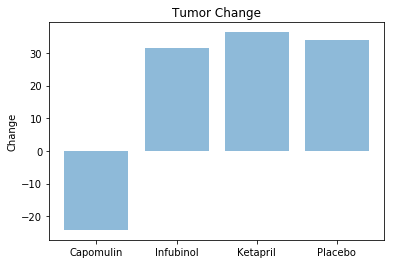

In [242]:
#Labels for x-axis from index of df
labels = tumordf2.index

#Number of x positions for chart
y_pos = np.arange(len(labels))

#Values to plot
plot_vals = tumordf2['Change']

#Great bar container
plt.bar(y_pos, plot_vals, align='center', alpha=0.5)

#Formatting and labeling
plt.xticks(y_pos, labels)
plt.ylabel('Change')
plt.title('Tumor Change')
 
#plt.show()



In [243]:
# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
# y_pos = np.arange(len(objects))
# performance = [10,8,6,4,2,1]
 
# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')
 
# plt.show()

<ErrorbarContainer object of 3 artists>

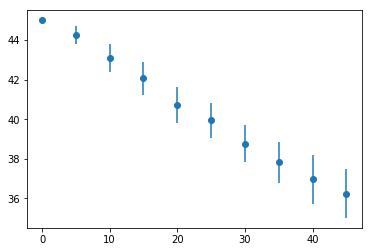

In [255]:
#errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)[source]
x_vals = unstacked_all.index
y_vals = unstacked_all['Tumor Volume (mm3)']['mean']['Capomulin']
errors = unstacked_all['Tumor Volume (mm3)']['sem']['Capomulin']
plt.errorbar(x_vals,y_vals,yerr=errors,fmt='o')

Text(0, 0.5, 'y')

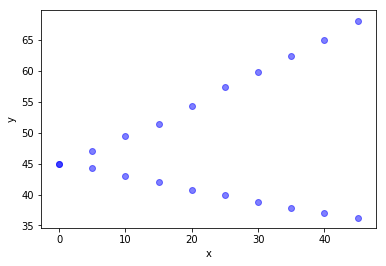

In [254]:
#Plot tumor volume by timepoint
# tumor_df = unstacked_all['Tumor Volume (mm3)']['mean']['Placebo']
# tumor_df.plot()
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.title('Scatter plot pythonspot.com')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()
x_times = unstacked_all.index
y_vals1 = unstacked_all['Tumor Volume (mm3)']['mean']['Capomulin']
y_vals2 = unstacked_all['Tumor Volume (mm3)']['mean']['Placebo']
plt.scatter(x_times, y_vals1, c='b', alpha=0.5)
plt.scatter(x_times, y_vals2, c='b', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
#plt.show()

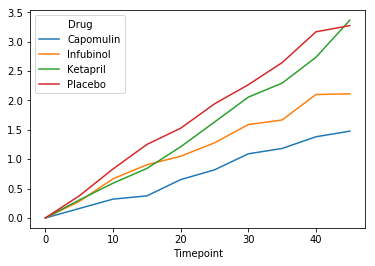

In [245]:
#Plot metastatic sites by timepoint
metSites_df = unstacked_all['Metastatic Sites']['mean']
metSites_df.plot()

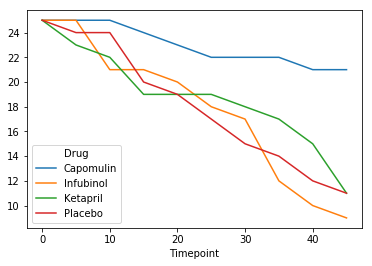

In [246]:
#Plot surviving mice by timepoints
liveMice_df = unstacked_all['Mouse ID']['count']
liveMice_df.plot()

In [247]:
tumor_vols = unstacked_all['Tumor Volume (mm3)']['mean']['Capomulin']
tumor_volsdf = pd.DataFrame(tumor_vols)
tumor_volsdf

,Capomulin
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325
25,39.939528
30,38.769339
35,37.816839
40,36.958001


In [248]:
#Group by drug and timepoints and calculate mean metastatic sites
metSites_group = subset_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
metSites_df = pd.DataFrame(metSites_group)
metSites_df
#try unstack to pivot a level of index labels to a new level of column labels
#  s.unstack(level=0)
#    one  two
# a  1.0   3.0
# b  2.0   4.0
unstacked_metSitesdf = metSites_df.unstack(level=0)
unstacked_metSitesdf


Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316
25                0.818182  1.277778  1.631579  1.941176
30                1.090909  1.588235  2.055556  2.266667
35                1.181818  1.666667  2.294118  2.642857
40                1.380952  2.100000  2.733333  3.166667
45                1.476190  2.111111  3.363636  3.272727

In [249]:
#Group by drug and timepoints and count remaining mice to determine survival rate over time
miceCount_group = subset_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
miceCount_df = pd.DataFrame(miceCount_group)
miceCount_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
Ketapril  0                25
          5                23
          10               22
          15               19
          20               19
          25               19
          30               18
          35               17
          40               15
          45               11
Placebo   0                25
          5                24
          10               24
          15               20
          20               19
          25               17
          30               15
          35               14
          40               12
          45               11

In [250]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)

In [251]:

#Make index the Mouse ID
#So we do find the averages, quartiles, etc. for each drug at each timepoint, and plot those all together
#Each summary drug timepoint will be a single point with error bars denoting the spread over mice for that particular drug/timepoint